In [1]:
#installing the biopython library
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.1 MB/s eta 0:00:00


In [2]:

#question1
nucleotides = ('A', 'C', 'G', 'T')
# Function to generate a list containing the original sequence (no mutations)
def generate_no_mutations(seq):
    return [seq]

# Function to generate all sequences with one point mutation
def gen_1_mutation(seq):
    return [seq[:index] + nt + seq[index+1:] for index in range(len(seq)) for nt in nucleotides if nt != seq[index]]

# Function to generate all sequences with two point mutations
def gen_2_mutations(seq):
    # Generate mutations for a given position and sequence
    def mutate_at_position(position, sequence):
        return [sequence[:position] + nt + sequence[position+1:] for nt in nucleotides if nt != sequence[position]]

    # Generate all single mutations
    single_mutations = [mutate_at_position(i, seq) for i in range(len(seq))]

    # Generate all double mutations
    double_mutations = [mutate_at_position(j, single_mutation)
                        for i in range(len(seq) - 1)
                        for single_mutation in single_mutations[i]
                        for j in range(i + 1, len(seq))]


    return [item for sublist in double_mutations for item in sublist]

# Function to find the consensus sequence of a list of sequences
def string_consensus(strings_list):
    return ''.join([max(set(s[i] for s in strings_list), key=lambda x: sum(1 for s in strings_list if s[i] == x)) for i in range(len(strings_list[0]))])

# Function to compute the Hamming distance between two sequences
def hamming_distance(seq1, seq2):
    return sum([1 for i in range(len(seq1)) if seq1[i] != seq2[i]])

# Function to validate if a sequence only contains valid nucleotides
def is_valid_sequence(seq):
    if all(char in nucleotides for char in seq):
        print("Validation: Input sequence is valid.")
        return True
    else:
        print("Validation: Input sequence contains invalid nucleotides.")
        return False


def analyze_sequence(input_seq):
    try:
        # Ensuring sequence length is 10 and it's a valid nucleotide sequence
        if len(input_seq) != 10 or not is_valid_sequence(input_seq):
            raise ValueError("Invalid sequence.")

        # Generating all possible sequences with 0, 1 or 2 mutations
        all_mutated_seqs = generate_no_mutations(input_seq) + gen_1_mutation(input_seq) + gen_2_mutations(input_seq)
        consensus_seq = string_consensus(all_mutated_seqs)
        distance = hamming_distance(input_seq, consensus_seq)

        # Create a dictionary for Hamming distances for each mutated string
        distances_for_each_string = {mut_seq: hamming_distance(input_seq, mut_seq) for mut_seq in all_mutated_seqs}
        sequences_column_wise = [[] for _ in range(len(input_seq))]

        # Count occurrences of 'A', 'T', 'G', 'C' in each column
        nucleotide_counts = {'A': [0] * len(input_seq), 'T': [0] * len(input_seq), 'G': [0] * len(input_seq), 'C': [0] * len(input_seq)}

        for seq in all_mutated_seqs:
            for i, char in enumerate(seq):
                sequences_column_wise[i].append(char)
                nucleotide_counts[char][i] += 1
        consensus_nucleotides = []


        for i in range(len(input_seq)):
            max_count = -1
            consensus_nucleotide = None
            for nucleotide, counts in nucleotide_counts.items():
                if counts[i] > max_count:
                    max_count = counts[i]
                    consensus_nucleotide = nucleotide
            consensus_nucleotides.append(consensus_nucleotide)
        # Constructing and returning the results dictionary
        return {
            'Original Sequence': input_seq,
            'Consensus Sequence': consensus_seq,
            'Hamming Distance (Consensus)': distance,
            'Hamming Distances (Each String)': distances_for_each_string,
            #'Hamming Distances (Each String)': distances_for_each_string,
            #'Sequences Column-Wise': sequences_column_wise,
            'nucleotide_counts': nucleotide_counts,
            'Consensus Nucleotides': consensus_nucleotides  # Add the consensus nucleotides
        }

    # Handling exceptions
    except Exception as e:
        return str(e)

# Taking input and processing the results
input_seq = input("Enter a sequence of 10 nucleotides (A, C, G, T): ")
result = analyze_sequence(input_seq)

if isinstance(result, dict):
    for key, value in result.items():
        if key != 'Hamming Distances (Each String)':
            print("%s: %s" % (key, value))
        else:
            print("\n%s:" % key)
            for seq, dist in value.items():
                print("%s: %d" % (seq, dist))
else:
    print(result)

Enter a sequence of 10 nucleotides (A, C, G, T): ATACGTACGA
Validation: Input sequence is valid.
Original Sequence: ATACGTACGA
Consensus Sequence: ATACGTACGA
Hamming Distance (Consensus): 0

Hamming Distances (Each String):
ATACGTACGA: 0
CTACGTACGA: 1
GTACGTACGA: 1
TTACGTACGA: 1
AAACGTACGA: 1
ACACGTACGA: 1
AGACGTACGA: 1
ATCCGTACGA: 1
ATGCGTACGA: 1
ATTCGTACGA: 1
ATAAGTACGA: 1
ATAGGTACGA: 1
ATATGTACGA: 1
ATACATACGA: 1
ATACCTACGA: 1
ATACTTACGA: 1
ATACGAACGA: 1
ATACGCACGA: 1
ATACGGACGA: 1
ATACGTCCGA: 1
ATACGTGCGA: 1
ATACGTTCGA: 1
ATACGTAAGA: 1
ATACGTAGGA: 1
ATACGTATGA: 1
ATACGTACAA: 1
ATACGTACCA: 1
ATACGTACTA: 1
ATACGTACGC: 1
ATACGTACGG: 1
ATACGTACGT: 1
CAACGTACGA: 2
CCACGTACGA: 2
CGACGTACGA: 2
CTCCGTACGA: 2
CTGCGTACGA: 2
CTTCGTACGA: 2
CTAAGTACGA: 2
CTAGGTACGA: 2
CTATGTACGA: 2
CTACATACGA: 2
CTACCTACGA: 2
CTACTTACGA: 2
CTACGAACGA: 2
CTACGCACGA: 2
CTACGGACGA: 2
CTACGTCCGA: 2
CTACGTGCGA: 2
CTACGTTCGA: 2
CTACGTAAGA: 2
CTACGTAGGA: 2
CTACGTATGA: 2
CTACGTACAA: 2
CTACGTACCA: 2
CTACGTACTA: 2
CTACGT

--2023-09-10 16:17:13--  https://www.be-md.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR25473749
Resolving www.be-md.ncbi.nlm.nih.gov (www.be-md.ncbi.nlm.nih.gov)... 130.14.29.110, 2607:f220:41e:4290::110
Connecting to www.be-md.ncbi.nlm.nih.gov (www.be-md.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘fastq?acc=SRR25473749’

fastq?acc=SRR254737     [      <=>           ]  55.92M  1.52MB/s    in 37s     

2023-09-10 16:17:51 (1.50 MB/s) - ‘fastq?acc=SRR25473749’ saved [58638390]

Read Length: 1923780
Mean Read Length: 49.50 bases
Number of Reads: 1923780


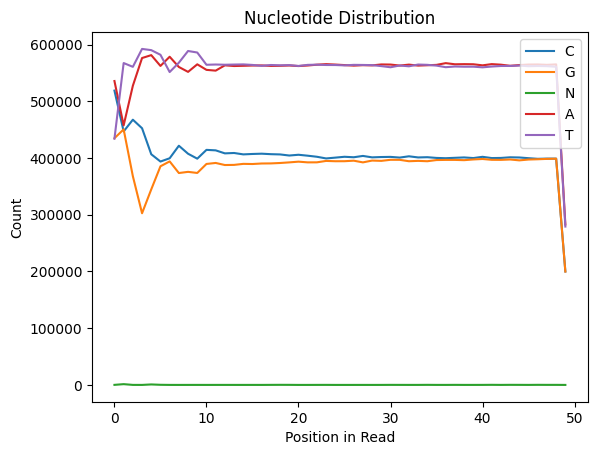

In [3]:
#question 2
!wget https://www.be-md.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR25473749
import gzip
from Bio import SeqIO
import matplotlib.pyplot as plt

# Define the FASTQ file name
fastq_file = "fastq?acc=SRR25473749"

# Initialize variables to store read length and count
read_lengths = []
read_count = 0

# Initialize variables to store nucleotide distribution
nucleotide_counts = {}

# Open the FASTQ file using gzip
with gzip.open(fastq_file, "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        # Calculate and store read length
        read_lengths.append(len(record.seq))

        # Count reads
        read_count = read_count + 1

        # Calculate nucleotide distribution
        for position, base in enumerate(record.seq):
            if position not in nucleotide_counts:
                nucleotide_counts[position] = {}  # Initialize the dictionary for this position
            if base in nucleotide_counts[position]:
                nucleotide_counts[position][base] += 1
            else:
                nucleotide_counts[position][base] = 1


# Calculate the mean read length
mean_read_length = sum(read_lengths) / len(read_lengths)

# Print results
print(f"Read Length: {len(read_lengths)}")
print(f"Mean Read Length: {mean_read_length:.2f} bases")
print(f"Number of Reads: {read_count}")

# Plot nucleotide distribution
positions = list(nucleotide_counts.keys())
nucleotides = list(set(base for pos in nucleotide_counts.values() for base in pos.keys()))

for base in nucleotides:
    counts = [nucleotide_counts[position].get(base, 0) for position in positions]
    plt.plot(positions, counts, label=base)

plt.xlabel("Position in Read")
plt.ylabel("Count")
plt.title("Nucleotide Distribution")
plt.legend(loc='upper right')
plt.show()

In [4]:
#question 3
import random
import numpy as np






def gibbs_sampler(sequences, k, N):
    motifs = [seq[random.randint(0, len(seq) - k):][:k] for seq in sequences]
    #k is in respect to motif length
    best_motifs = motifs[:]
    for j in range(N):
        i = random.randint(0, len(sequences) - 1)
        current_seq = sequences[i]
        current_motif = motifs[i]
        # Calculate probabilities using other motifs and sample a new motif from current_seq
        other_motifs = motifs[:i] + motifs[i+1:]
        profile = make_profile(other_motifs)
        probabilities = calc_motif_probs(current_seq, k, profile)
        new_motif_position = np.random.choice(len(current_seq) - k + 1, p=probabilities)
        motifs[i] = current_seq[new_motif_position:new_motif_position+k]
        #updating score accordingly when better candidate is found
        if score(motifs) < score(best_motifs):
            best_motifs = motifs[:]
    return best_motifs

# this is the code to make the profile matrix which will be used to find the score later on
def make_profile(motifs):
    profile = {'A': [1]*len(motifs[0]), 'C': [1]*len(motifs[0]), 'G': [1]*len(motifs[0]), 'T': [1]*len(motifs[0])}  # Initializing with pseudocounts
    for motif in motifs:
        for i, nucleotide in enumerate(motif):
            profile[nucleotide][i] += 1
    for nucleotide in profile:
        for i in range(len(profile[nucleotide])):
            profile[nucleotide][i] /= (len(motifs) + 4)  # Including the pseudocounts
    return profile

def calc_motif_probs(seq, k, profile):
    probabilities = []
    total = 0
    # iterating through each of the column and then we calculate the probabilites for each of the column
    for i in range(len(seq) - k + 1):
        kmer = seq[i:i+k]
        prob = 1.0
        for j, nucleotide in enumerate(kmer):
            prob *= profile[nucleotide][j]
        probabilities.append(prob)
        total += prob
    return [p/total for p in probabilities]

def score(motifs):
    score = 0
    for i in range(len(motifs[0])):
        motif_count = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
        for motif in motifs:
            motif_count[motif[i]] += 1
        score += (len(motifs) - max(motif_count.values()))
    return score

def add_mutations(sequence, num_mutations):
    mutated_positions = random.sample(range(len(sequence)), num_mutations)
    mutated_sequence = list(sequence)
    for position in mutated_positions:
        mutated_sequence[position] = random.choice('ACGT'.replace(sequence[position], ''))
    return ''.join(mutated_sequence)

def plant_motif(sequence, motif, motif_start):
    planted_seq = sequence[:motif_start] + motif + sequence[motif_start + len(motif):]
    # we are basically indexing the at the motif start position to fit the motif
    return planted_seq


# this is the code which helps in 100 sequences of 1KB each
def generate_seq():
    sequences = []
    mutation_pos = [0, 1, 2]
    motif = "AGTCAGTCAG"
    for i in range(100):
        sequence = generate_random_seq(1000)
        motif_start = random.randint(0, len(sequence) - len(motif))
        sequence_with_motif = plant_motif(sequence, motif, motif_start)
        sequence_with_mutations = add_mutations(sequence_with_motif, random.choice(mutation_pos))
        sequences.append(sequence_with_mutations)
    return sequences

def generate_random_seq(length):
    return ''.join(random.choice('ACGT') for i in range(length))



sample_seq = generate_seq()
motif_len = 10
num_of_iterations = 15

best_motifs = gibbs_sampler(sample_seq, motif_len, num_of_iterations)
consensus_motif = ''.join([max(set(col), key=col.count) for col in zip(*best_motifs)])
print("motifs found :", best_motifs)
print("Consensus motif:", consensus_motif)

motifs found : ['ATATGGCGCT', 'TGGCTCGCGG', 'GGAATAGTAC', 'GTGCCGTGGG', 'TATGCACTAG', 'GCATTTGGTG', 'GGGTTTAAAA', 'ACATTCGCCA', 'CACAGGGTCC', 'TCGACACCCG', 'TTTTACGTGT', 'CTGTGCGCTA', 'TCTTCCACTA', 'CCGTGCATTT', 'GCCCAGCGGA', 'CGACCCGTGT', 'TGTGTAAGTG', 'CGTTGACATG', 'CGAGGACACG', 'ACACCTGACG', 'GAGAAAGGTG', 'TAGTCCTCGC', 'TTCATTGGTA', 'AGGGGGAAAG', 'GACCTCATCT', 'CTTCCGGACC', 'CTTTAAATAT', 'ATTATCATTC', 'CGTCAGGCTA', 'TGTCCGCGCA', 'GCCTACCATT', 'GCGCGGGTTG', 'CATACAGCAT', 'TCGTGTTAAT', 'ATAAACCCAG', 'CACATATCGT', 'TAGGCCAGTC', 'CATAGACTTT', 'GACACTGTTA', 'AGGAGTCAGT', 'TCTCACGGTG', 'CGGTTGCCAA', 'TGTTGTCCCT', 'GCTGTTTCGT', 'GCTCTAGGAG', 'TGCTGCTGAT', 'GCTTCGGTTT', 'TACACTCTTC', 'AAAAAACCTC', 'TCTTCTAAGT', 'GAGCTTCCAG', 'CAAAAAGTTG', 'GTTTCAGGGC', 'TTTCAGGAGA', 'GATAGAAGGC', 'TGGCGCGAGA', 'TCTCCATCCA', 'CCTTAGGTCC', 'AACCTACAAA', 'GGTTTATCAG', 'TTCGGACTGT', 'AGCATTCCGT', 'GGGTTACTCA', 'TCCAAAACTA', 'TATGCGTCTT', 'CGGAACTGGC', 'CCCAGGTTCC', 'CAATTCGAGC', 'ATCAATCAAG', 'GCTTGTGGGG', 'TAG